<a href="https://colab.research.google.com/github/Trung0Minh/AIO2023-MODULE-2/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

def f(x):
    return 3*x**4 - 4*x**2 -6*x - 3

#x = random.uniform(-10, 10)
num_iterations = 100
step = 0.1

def find_minimum(f, x, num_iterations, step):
    for i in range(num_iterations):
        dx = 1e-5
        df = (f(x + dx/2) - f(x - dx/2)) / dx
        if df > 0:
            x = x - step
        elif df < 0:
            x = x + step
        else:
            continue
    return x

x = 8.033107966229196
find_minimum(f, x, num_iterations, step)

1.033107966229207

In [ ]:
def compute_x_derivative(image):
    w = len(image[0])
    h = len(image)
    x_derivative = [[0]*w for _ in range(h)]

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            x_derivative[i][j] = image[i][j + 1] - image[i][j - 1]

    return x_derivative

def compute_y_derivative(image):
    w = len(image[0])
    h = len(image)
    y_derivative = [[0]*w for _ in range(h)]

    for j in range(1, w - 1):
        for i in range(1, h - 1):
            y_derivative[i][j] = image[i + 1][j] - image[i - 1][j]

    return y_derivative

def compute_magnitude_xy(image):
    w = len(image[0])
    h = len(image)
    gradient_magnitude = [[0]*w for _ in range(h)]

    x_d = compute_x_derivative(image)
    y_d = compute_y_derivative(image)

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            gradient_magnitude[i][j] = (x_d[i][j]**2 + y_d[i][j]**2)**0.5

    return gradient_magnitude

In [ ]:
!wget https://i.pinimg.com/736x/b6/3e/2b/b63e2b94b3f4362cff28d3624a488ea9.jpg

--2024-12-18 05:21:35--  https://i.pinimg.com/736x/b6/3e/2b/b63e2b94b3f4362cff28d3624a488ea9.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.0.84, 151.101.64.84, 151.101.128.84, ...
Connecting to i.pinimg.com (i.pinimg.com)|151.101.0.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36868 (36K) [image/jpeg]
Saving to: ‘b63e2b94b3f4362cff28d3624a488ea9.jpg’

b63e2b94b3f4362cff2 100%[===================>]  36.00K  --.-KB/s    in 0.01s   

2024-12-18 05:21:35 (2.74 MB/s) - ‘b63e2b94b3f4362cff28d3624a488ea9.jpg’ saved [36868/36868]



Text(0.5, 1.0, 'Gradient Magnitude')

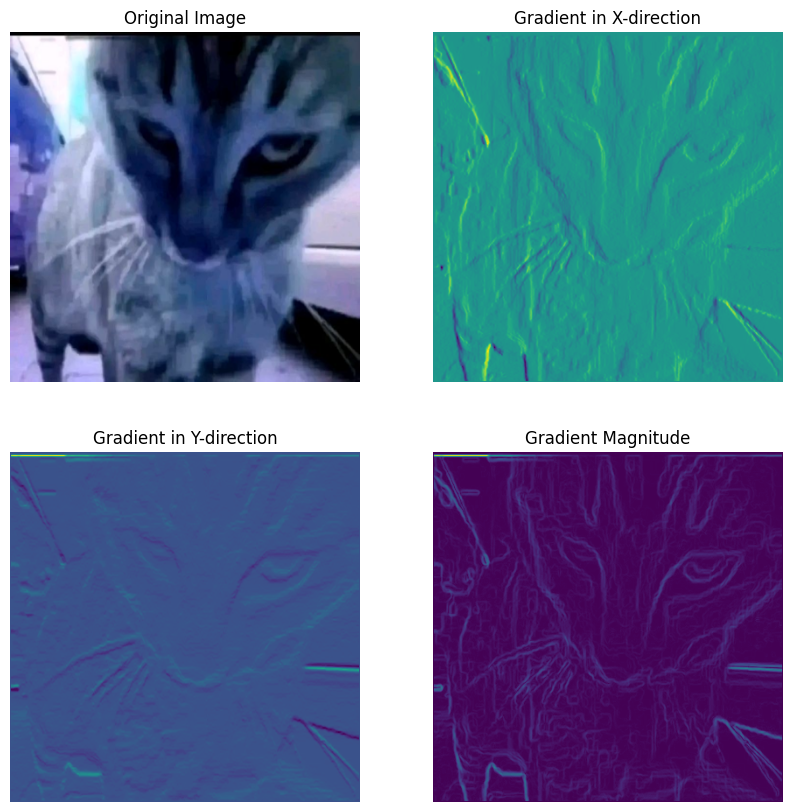

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

cat_image = cv2.imread('cat.jpg')
cat_image = cv2.resize(cat_image, (400, 400), interpolation=cv2.INTER_AREA)

grey_cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)
cat_image_list = grey_cat_image.tolist()
x_derivative = compute_x_derivative(cat_image_list)
y_derivative = compute_y_derivative(cat_image_list)
gradient_magnitude = compute_magnitude_xy(cat_image_list)

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2,2,1)
plt.imshow(cat_image)
plt.axis("off")
plt.title("Original Image")

fig.add_subplot(2,2,2)
plt.imshow(x_derivative)
plt.axis("off")
plt.title("Gradient in X-direction")

fig.add_subplot(2,2,3)
plt.imshow(y_derivative)
plt.axis("off")
plt.title("Gradient in Y-direction")

fig.add_subplot(2,2,4)
plt.imshow(gradient_magnitude)
plt.axis("off")
plt.title("Gradient Magnitude")

In [ ]:
import numpy as np

def get_column(data, index):
    return data[:, index]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X,y

In [ ]:
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

def compute_loss(y_hat, y):
    loss = (y_hat - y)**2
    return loss

def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*(y_hat - y)*xi
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

def implement_linear_regression(X_data, y_data, epochs=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epochs):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][1]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            losses.append(loss)
    return (w1, w2, w3, b, losses)

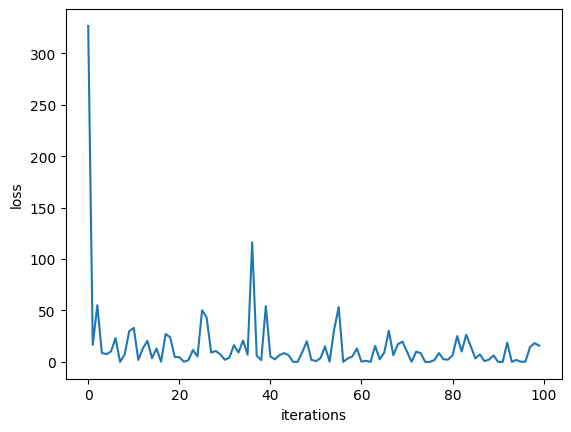

In [ ]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [ ]:
def implement_linear_regression_nsamples(X_data, y_data, epochs=1000, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epochs):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][1]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)
            loss_total += loss

            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        losses.append(loss_total / N)
    return (w1, w2, w3, b, losses)

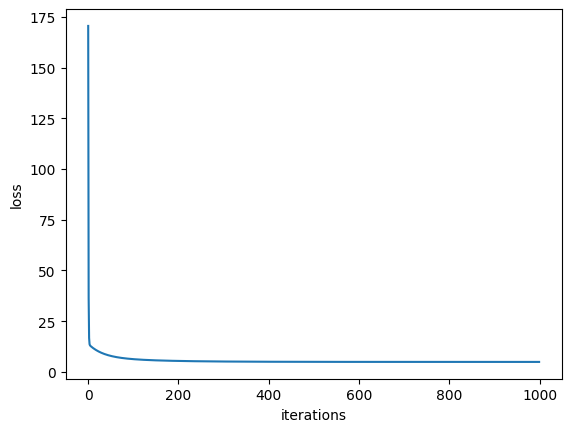

In [ ]:
X, y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y)
plt.plot(losses)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [ ]:
def get_column(data, index):
    return data[:, index]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1)
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X,y

In [ ]:
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]

def predict(X_features, weights):
    result = 0
    for i in range(len(weights)):
        result += weights[i] * X_features[i]
    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = []
    for i in range(len(X_features)):
        dl_dweights.append(2*(y_hat - y)*X_features[i])
    return dl_dweights

def update_weight(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] = weights[i] - lr * dl_dweights[i]
    return weights

def implement_linear_regression(X_features, y_output, epochs=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)

    for epoch in range(epochs):
        print("epoch: ", epoch)
        for i in range(N):
            features_i = X_features[i]
            y = y_output[i]

            y_hat = predict(features_i, weights)

            loss = compute_loss(y_hat, y)

            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            weights = update_weight(weights, dl_dweights, lr)

            losses.append(loss)
    return weights, losses

epoch:  0
epoch:  1
epoch:  2
epoch:  3
epoch:  4
epoch:  5
epoch:  6
epoch:  7
epoch:  8
epoch:  9
epoch:  10
epoch:  11
epoch:  12
epoch:  13
epoch:  14
epoch:  15
epoch:  16
epoch:  17
epoch:  18
epoch:  19
epoch:  20
epoch:  21
epoch:  22
epoch:  23
epoch:  24
epoch:  25
epoch:  26
epoch:  27
epoch:  28
epoch:  29
epoch:  30
epoch:  31
epoch:  32
epoch:  33
epoch:  34
epoch:  35
epoch:  36
epoch:  37
epoch:  38
epoch:  39
epoch:  40
epoch:  41
epoch:  42
epoch:  43
epoch:  44
epoch:  45
epoch:  46
epoch:  47
epoch:  48
epoch:  49


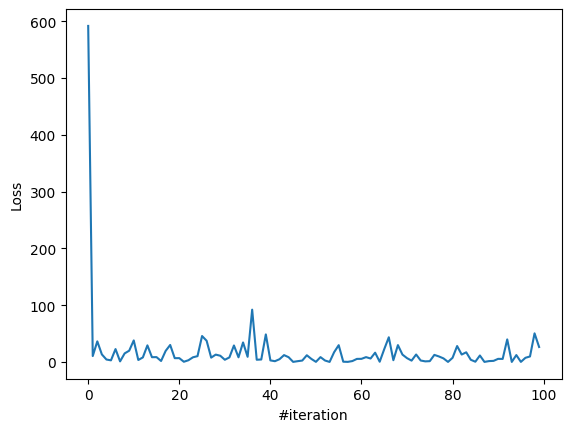

In [ ]:
X,y = prepare_data ('advertising.csv')
W,L = implement_linear_regression (X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
import numpy as np
a = np. array([5 ,7 ,9 ,8 ,6 ,4 ,5])
b = np. array([6 ,3 ,4 ,8 ,9 ,7 ,1])
print(np.where(a < b, a, b))
print(np.where(a < b, b, a))

[5 3 4 8 6 4 1]
[6 7 9 8 9 7 5]


In [ ]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt

In [ ]:
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:, :3]
y = data[:, 3]

def mean_normalization(X):
    N = len(X)
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    return X_b, maxi, mini, avg

X_b, maxi, mini, avg = mean_normalization(X)

In [ ]:
X_b

array([[ 1.00000000e+00,  5.50426788e-01, -9.83586370e-02,
         7.57928475e-03],
       [ 1.00000000e+00, -7.57540486e-02, -9.32979082e-02,
        -7.37297571e-02],
       [ 1.00000000e+00, -1.67859312e-01, -7.10307018e-02,
         7.91666667e-03],
       [ 1.00000000e+00,  2.85244602e-01, -8.65502699e-02,
        -2.85205803e-02],
       [ 1.00000000e+00,  3.84097503e-01, -1.89451754e-01,
        -2.88579622e-02],
       [ 1.00000000e+00, -1.96536775e-01, -6.09092443e-02,
         2.71474359e-02],
       [ 1.00000000e+00, -3.18943995e-02, -1.15227733e-01,
        -1.46604251e-01],
       [ 1.00000000e+00,  1.79644062e-01, -1.59762146e-01,
        -1.86752699e-01],
       [ 1.00000000e+00, -1.96874157e-01, -2.18803981e-01,
        -2.22515182e-01],
       [ 1.00000000e+00,  4.48200067e-01, -2.17117072e-01,
        -1.54364035e-01],
       [ 1.00000000e+00, -2.87955466e-03, -2.06320850e-01,
        -1.44242578e-01],
       [ 1.00000000e+00,  4.98469973e-01, -1.44917341e-01,
      

In [ ]:
xi = X_b[5].reshape(1,4)
xi.shape

(1, 4)

In [ ]:
def predict(xi, thetas):
    return np.dot(xi, thetas)

def compute_loss(y_hat, y):
    return (y_hat - y)**2 / 2

def gradient(y_hat, y, xi):
    return 2*(y_hat - y) * xi

def update_weights(thetas, learning_rate, grad):
    return thetas - learning_rate * grad

In [ ]:
thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
thetas.shape

(4, 1)

In [ ]:
np.dot(xi, thetas)

array([[1.24690189]])

In [ ]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=1e-4):
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        for i in range(N):
            random_index = np.random.randint(N)

            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            y_hat = predict(xi, thetas)

            loss = compute_loss(y_hat, yi)
            losses.append(loss[0,0])

            grad = gradient(y_hat, yi, thetas)
            thetas = update_weights(thetas, learning_rate, grad)

        #thetas_path.append(thetas)
        #print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {np.mean(losses)}")

    return thetas_path, losses

<ipython-input-25-3a4fb6e69be7>:5: RuntimeWarning: overflow encountered in square
  return (y_hat - y)**2 / 2
<ipython-input-25-3a4fb6e69be7>:8: RuntimeWarning: overflow encountered in multiply
  return 2*(y_hat - y) * xi


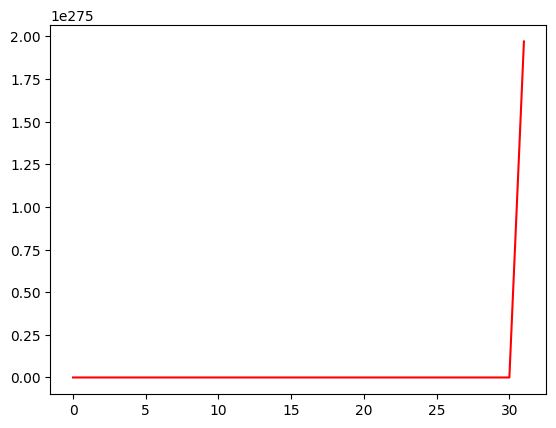

In [ ]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.02 )

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

In [ ]:
def predict(xi, thetas):
    return np.dot(xi, thetas)

def compute_loss(y_hat, y):
    return (y_hat - y)**2

def gradient(y_hat, y, xi):
    return np.dot(xi.T, 2*(y_hat - y))

def update_weights(thetas, learning_rate, grad):
    return thetas - learning_rate * grad

In [ ]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size = 20, learning_rate=0.01):
    thetas = np.asarray([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        shuffled_indices = np. asarray ([21 , 144 , 17, 107 , 37, 115 , 167 , 31, 3,
        132 , 179 , 155 , 36, 191 , 182 , 170 , 27, 35, 162 , 25, 28, 73, 172 , 152 , 102 , 16,
        185 , 11, 1, 34, 177 , 29, 96, 22, 76, 196 , 6, 128 , 114 , 117 , 111 , 43, 57, 126 ,
        165 , 78, 151 , 104 , 110 , 53, 181 , 113 , 173 , 75, 23, 161 , 85, 94, 18, 148 , 190 ,
        169 , 149 , 79, 138 , 20, 108 , 137 , 93, 192 , 198 , 153 , 4, 45, 164 , 26, 8, 131 ,
        77, 80, 130 , 127 , 125 , 61, 10, 175 , 143 , 87, 33, 50, 54, 97, 9, 84, 188 , 139 ,
        195 , 72, 64, 194 , 44, 109 , 112 , 60, 86, 90, 140 , 171 , 59, 199 , 105 , 41, 147 ,
        92, 52, 124 , 71, 197 , 163 , 98, 189 , 103 , 51, 39, 180 , 74, 145 , 118 , 38, 47,
        174 , 100 , 184 , 183 , 160 , 69, 91, 82, 42, 89, 81, 186 , 136 , 63, 157 , 46, 67,
        129 , 120 , 116 , 32, 19, 187 , 70, 141 , 146 , 15, 58, 119 , 12, 95, 0, 40, 83, 24,
        168 , 150 , 178 , 49, 159 , 7, 193 , 48, 30, 14, 121 , 5, 142 , 65, 176 , 101 , 55,
        133 , 13, 106 , 66, 99, 68, 135 , 158 , 88, 62, 166 , 156 , 2, 134 , 56, 123 , 122 ,
        154])

        X_b_shuffled = X_b[ shuffled_indices ]
        y_shuffled = y[ shuffled_indices ]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i + minibatch_size]
            yi = y_shuffled[i:i + minibatch_size].reshape(20,1)

            y_hat = predict(xi, thetas)

            loss = compute_loss(y_hat, yi)
            losses.append(loss[0,0])

            grad = gradient(y_hat, yi, xi)
            thetas = update_weights(thetas, learning_rate, grad)

        #thetas_path.append(thetas)
        #print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {np.mean(losses)}")

    return thetas_path, losses

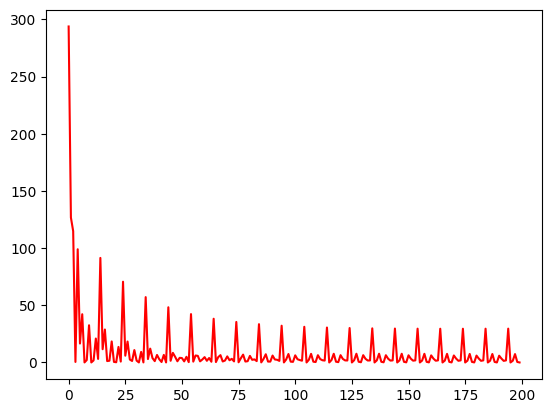

In [ ]:
mbgd_thetas , losses = mini_batch_gradient_descent(X_b , y, n_epochs =50, minibatch_size = 20, learning_rate =0.01)

x_axis = list ( range (200) )
plt.plot ( x_axis , losses [:200] , color ="r")
plt.show ()

In [ ]:
import numpy as np

In [ ]:
def computeVectorLength(vector):
    len_of_vector = len(vector)
    return len_of_vector

In [ ]:
def computeDotProduct(vector1, vector2):
    return vector1 @ vector2

In [ ]:
def matrix_multi_vector(matrix, vector):
    return matrix @ vector

In [ ]:
matrix = np.array([[1,2,3],
                   [4,5,6]])
vector = np.array([7,8,9]).reshape(-1,1)
matrix_multi_vector(matrix, vector)

array([[ 50],
       [122]])

In [ ]:
def matrix_multi_matrix(matrix1, matrix2):
    if (matrix1.shape[1] != matrix2.shape[0]):
        print("Shape not match")
        return
    return matrix1 @ matrix2

In [ ]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3],[6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


$A =
\begin{pmatrix}
    -2 & 6 \\
    8 & -4
\end{pmatrix}, A \in R^{2*2}$

Determiant of $A \in R^{2*2}: det(A) = ad - bc$

$det(A) = (-2)*(-4) - 8*6 = -40$

$A^{-1} = \frac{1}{det(A)} = \frac{1}{-40}$


In [ ]:
A = np.array([[0.9, 0.2],
              [0.1, 0.8]])

eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvectors

array([[ 0.89442719, -0.70710678],
       [ 0.4472136 ,  0.70710678]])

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
def computeDifference(bg_img, input_img):
    difference_three_channel = cv2.absdiff(bg_img, input_img)
    difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0
    difference_single_channel = difference_single_channel.astype('uint8')
    return difference_single_channel

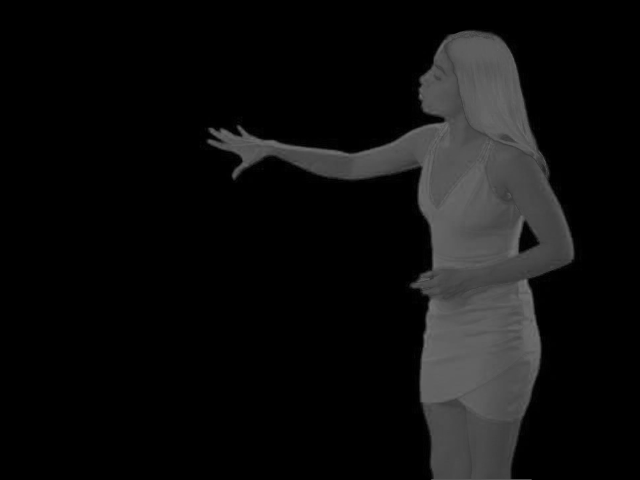

In [ ]:
bg1_img = cv2.imread('background.png')
bg1_img = cv2.resize(bg1_img, (640, 480))

ob_img = cv2.imread('StillImage.png')
ob_img = cv2.resize(ob_img, (640, 480))

difference_single_channel = computeDifference(bg1_img, ob_img)
cv2_imshow(difference_single_channel)

In [ ]:
def computeBinaryMask(difference_single_channel):
    difference_binary = np.where(difference_single_channel >= 15, 255, 0)
    print(difference_binary.shape)
    difference_binary = np.stack((difference_binary,)*3, axis=2)
    print(difference_binary.shape)
    return difference_binary

(480, 640)
(480, 640, 3)


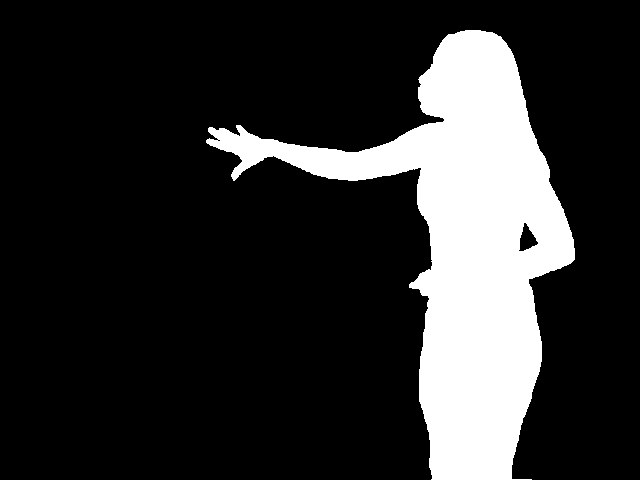

In [ ]:
difference_binary = computeBinaryMask(difference_single_channel)
cv2_imshow(difference_binary)

In [ ]:
def replaceBakcground(bg1_img, bg2_img, ob_img):
    difference_single_channel = computeDifference(bg1_img, ob_img)
    difference_binary = computeBinaryMask(difference_single_channel)

    output = np.where(difference_binary == 0, bg2_img, ob_img)
    return output

(480, 640)
(480, 640, 3)


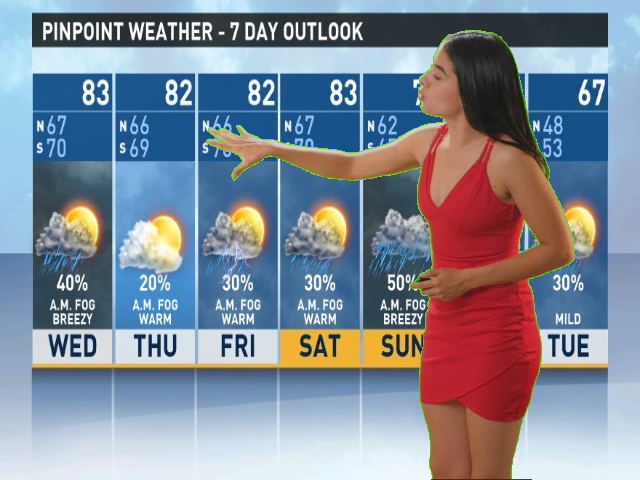

In [ ]:
bg2_img = cv2.imread('FakeBackground.png')
bg2_img = cv2.resize(bg2_img, (640, 480))

output = replaceBakcground(bg1_img, bg2_img, ob_img)
cv2_imshow(output)

In [ ]:
arr = np.array([[1,2,3],
                [4,5,6]])
(arr,)*3

(array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]]),
 array([[1, 2, 3],
        [4, 5, 6]]))

In [ ]:
import pandas as pd

diamond_df = pd.read_csv('diamonds.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
diamond_df.drop('Unnamed: 0', axis=1, inplace=True)
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
diamond_df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64
z,float64


In [ ]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

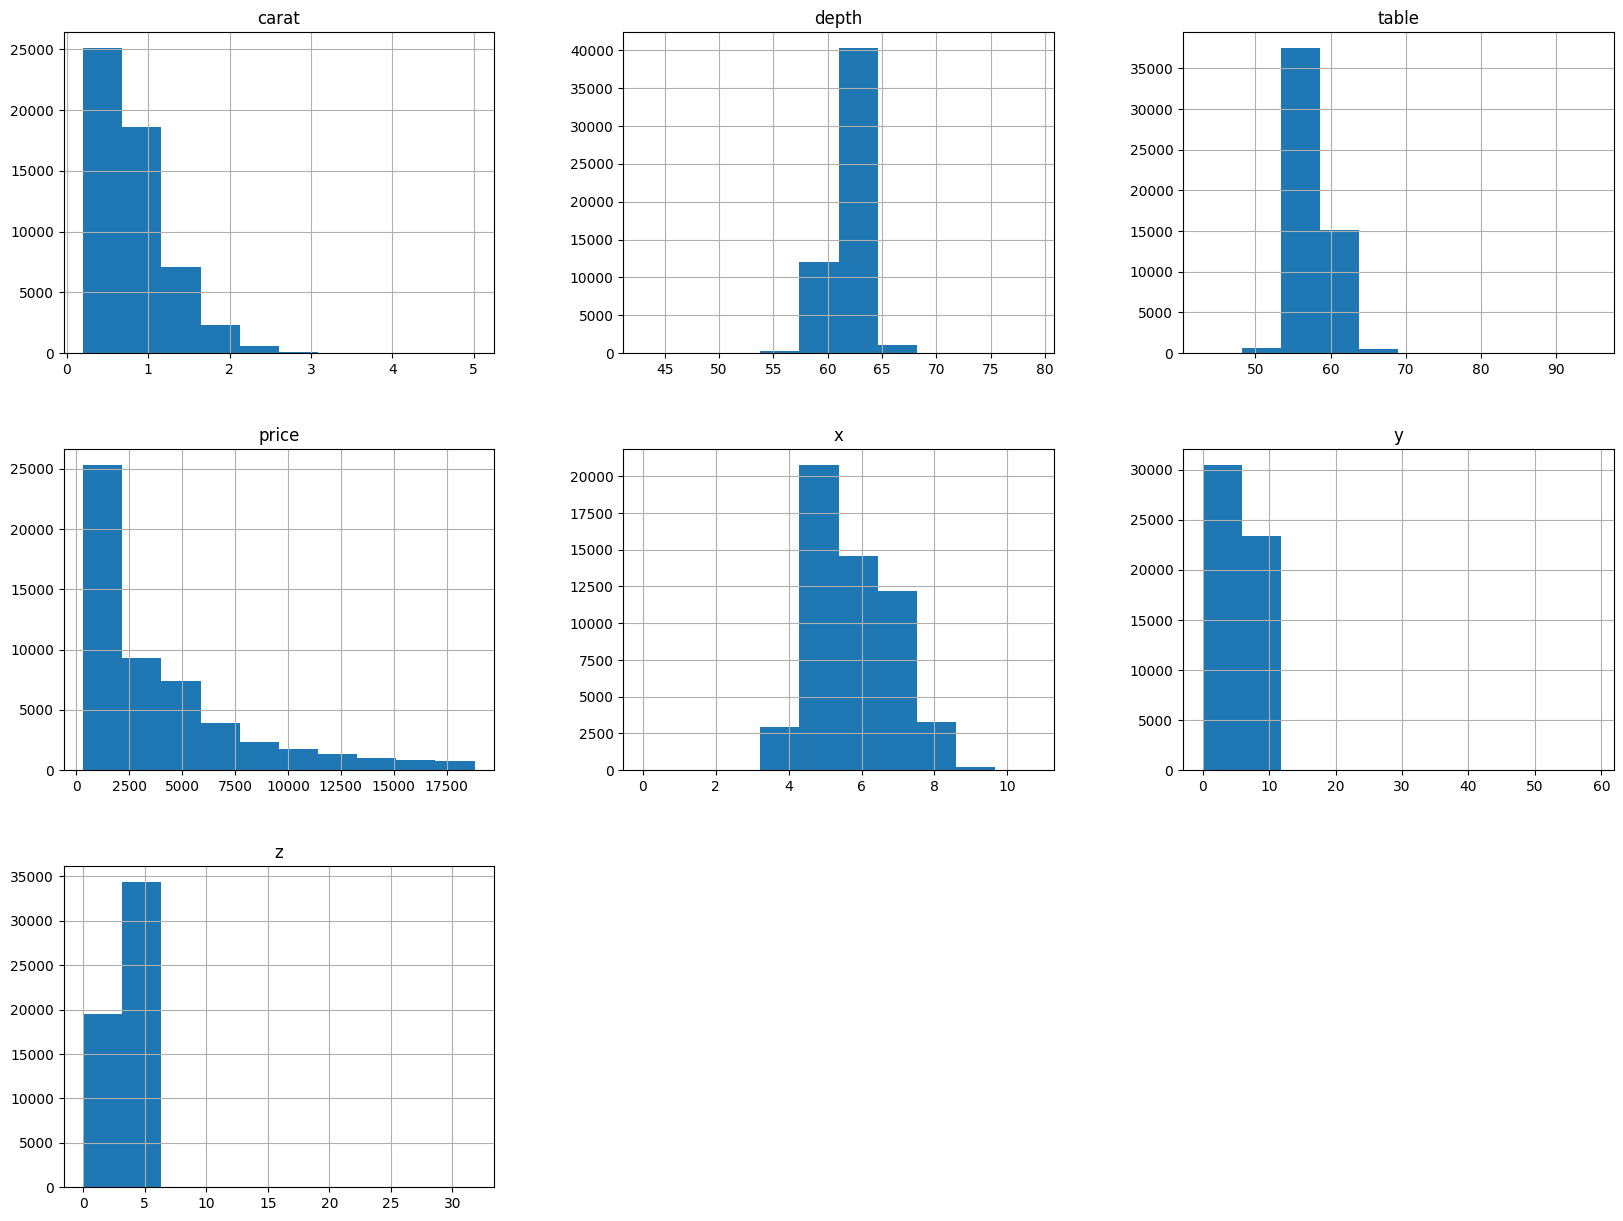

In [ ]:
import matplotlib.pyplot as plt

diamond_df.hist(figsize=(20, 15))

array([[<Axes: xlabel='carat', ylabel='carat'>,
        <Axes: xlabel='depth', ylabel='carat'>,
        <Axes: xlabel='table', ylabel='carat'>,
        <Axes: xlabel='price', ylabel='carat'>,
        <Axes: xlabel='x', ylabel='carat'>,
        <Axes: xlabel='y', ylabel='carat'>,
        <Axes: xlabel='z', ylabel='carat'>],
       [<Axes: xlabel='carat', ylabel='depth'>,
        <Axes: xlabel='depth', ylabel='depth'>,
        <Axes: xlabel='table', ylabel='depth'>,
        <Axes: xlabel='price', ylabel='depth'>,
        <Axes: xlabel='x', ylabel='depth'>,
        <Axes: xlabel='y', ylabel='depth'>,
        <Axes: xlabel='z', ylabel='depth'>],
       [<Axes: xlabel='carat', ylabel='table'>,
        <Axes: xlabel='depth', ylabel='table'>,
        <Axes: xlabel='table', ylabel='table'>,
        <Axes: xlabel='price', ylabel='table'>,
        <Axes: xlabel='x', ylabel='table'>,
        <Axes: xlabel='y', ylabel='table'>,
        <Axes: xlabel='z', ylabel='table'>],
       [<Axes: xlabel='ca

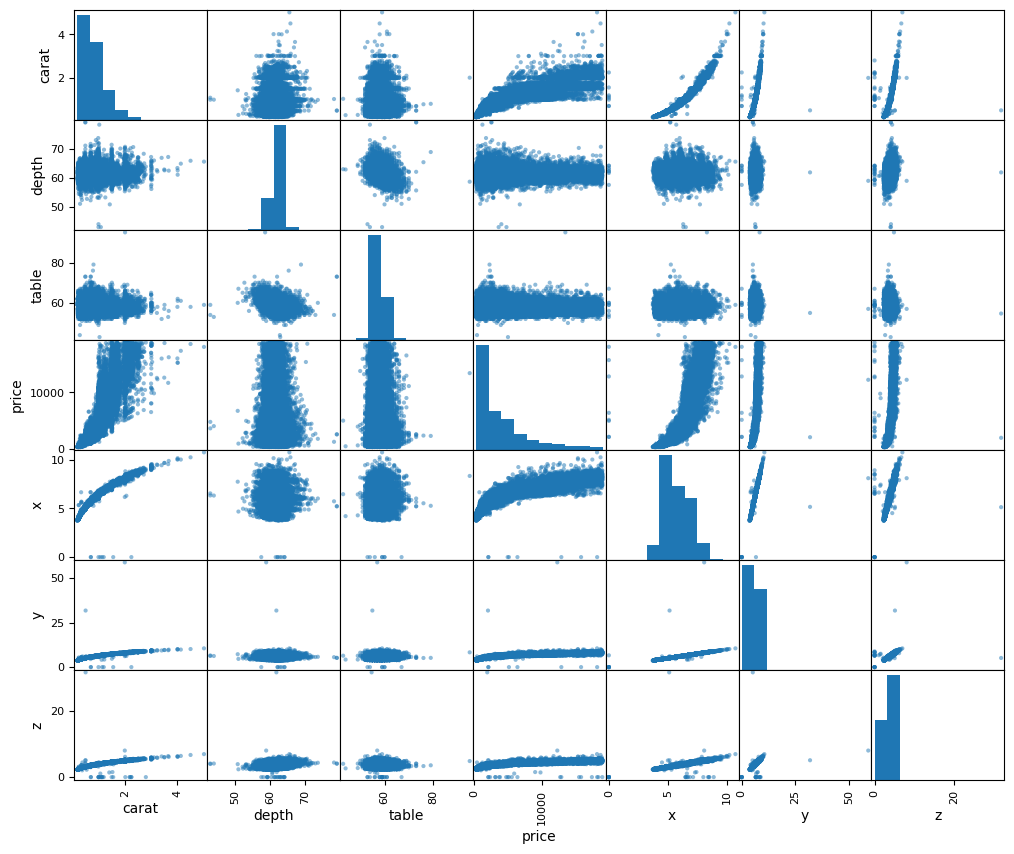

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(diamond_df, figsize=(12, 10))

In [ ]:
diamond_df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
cut_mapping = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

color_mapping = {
    'J': 1,
    'I': 2,
    'H': 3,
    'G': 4,
    'F': 5,
    'E': 6,
    'D': 7
}

clarity_mapping = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

In [ ]:
diamond_df['cut'] = diamond_df['cut'].map(cut_mapping)
diamond_df['color'] = diamond_df['color'].map(color_mapping)
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_mapping)

diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,1,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X = diamond_df.drop('price', axis=1)
y = diamond_df['price']

In [ ]:
X.shape, y.shape

((53940, 9), (53940,))

In [ ]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

In [ ]:
X_arr.shape, y_arr.shape

((53940, 9), (53940,))

In [ ]:
X_train = X_arr[:int(len(X_arr) * 0.8)]
y_train = y_arr[:int(len(y_arr) * 0.8)]

In [ ]:
X_test = X_arr[int(len(X_arr) * 0.8):]
y_test = y_arr[int(len(y_arr) * 0.8):]

In [ ]:
len(X_train) + len(X_test)

53940

In [ ]:
x_mean = X_train.mean(axis=0)
x_std = X_train.std(axis=0)
X_train = (X_train - x_mean) / x_std
X_test = (X_test - x_mean) / x_std

In [ ]:
import numpy as np

bias = np.ones(shape=(len(X_train), 1))
np.hstack((bias, X_train)).shape

(43152, 10)

In [ ]:
X_train.shape

(43152, 9)

In [ ]:
X_train = np.hstack((bias, X_train))
X_train.shape

(43152, 10)

In [ ]:
y_train

array([ 326,  326,  327, ..., 1389, 1389, 1389])

In [ ]:
np.random.randn(10, 1)

array([[-0.32408356],
       [-1.39014249],
       [ 0.02117094],
       [ 1.29618748],
       [-1.66754689],
       [-1.00440111],
       [ 0.90251968],
       [-1.9687791 ],
       [ 1.47180239],
       [-0.06597482]])

In [ ]:
N = len(X_train)
epochs = 1000
m = 1000
learning_rate = 0.001

thetas = np.random.randn(10, 1)
losses = []

for epoch in range(epochs):
    for i in range(0, N, m):
        x = X_train[i:i + m, :]
        y = y_train[i:i + m].reshape(-1,1)

        y_hat = np.dot(x, thetas)

        loss = np.multiply(y_hat - y, y_hat - y)
        losses.append(loss.mean())

        gradient = np.dot(x.T, 2*(y_hat - y)) / m

        thetas = thetas - learning_rate * gradient

In [ ]:
losses

[6829250.967638112,
 8157852.733538049,
 9284865.983595379,
 10139296.463178638,
 11853693.674201634,
 13207380.453864427,
 14135877.695883654,
 15851727.376968347,
 17102085.324357703,
 18455768.802977942,
 19294821.254555706,
 21673989.31615371,
 23659314.48266625,
 25191655.34780868,
 28971730.884974442,
 32374152.79312382,
 35145643.933464296,
 41031900.90341304,
 46777374.228623085,
 54205762.036585756,
 61144170.61931307,
 73559908.43120779,
 87025681.16946585,
 98595462.41708502,
 120873449.23636286,
 147457982.41887987,
 174930461.16393936,
 156802862.28495592,
 3204748.884679188,
 3119382.121202483,
 3110291.9327417496,
 3200929.4536555125,
 3212450.02377153,
 3266338.0952649503,
 3213161.5001745042,
 3246490.3886433635,
 3147284.094959978,
 3076678.7362887003,
 3083806.35031831,
 2839756.360659813,
 2764812.5913612535,
 2725333.890065568,
 2677096.727903961,
 2597739.6969799986,
 5608830.2214339245,
 6483117.276380188,
 6992364.687278136,
 7635928.732067741,
 8145420.92835039

In [ ]:
thetas

array([[4465.88491103],
       [4994.79890315],
       [ 146.6614534 ],
       [ 600.11524879],
       [ 925.84768789],
       [ -69.76047615],
       [ -68.0891696 ],
       [-116.33809598],
       [ -60.43622637],
       [-269.38331552]])

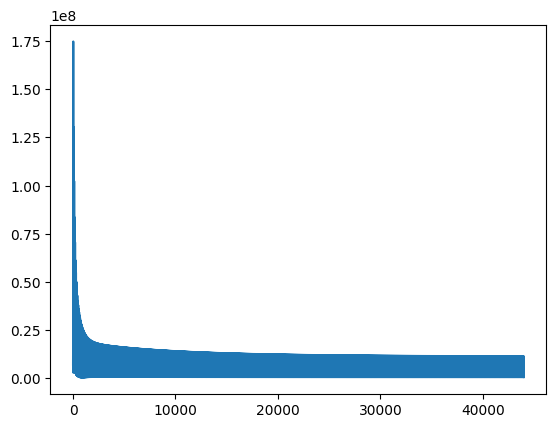

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
X_test = np.hstack((np.ones(shape=(len(X_test), 1)), X_test))
X_test.shape

(10788, 10)

In [ ]:
test_predictions = np.dot(X_test, thetas)
li = np.mean(np.square(test_predictions - y_test))
li

5451297.186007152

In [ ]:
li = np.mean(np.abs(test_predictions - y_test))
li

1937.8644185998219

In [ ]:
np.savez('weight.npz', x_mean=x_mean, x_std=x_std, theta=thetas)

In [ ]:
np.savez('data.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [ ]:
plt.scatter(losses,)

TypeError: scatter() missing 1 required positional argument: 'y'